In [2]:
using LinearAlgebra
using Plots
using Printf

In [2]:
import Pkg

In [3]:
# Pkg.instantiate()

In [4]:
# Pkg.update()

In [5]:
function f(v, mu)
    nv = [v[4] v[5] v[6] 0 0 0]
    mu_ = 1-mu
    R3 = sqrt((v[1]+mu)^2+v[2]^2+v[3]^2)^3
    r3 = sqrt((v[1]+mu-1)^2+v[2]^2+v[3]^2)^3
    nv[4] = -v[5]+(mu_/R3)*(v[1]+mu)+(mu/r3)*(v[1]+mu-1)
    nv[5] = v[4]+(mu_/R3)*v[2]+(mu/r3)*v[2]
    nv[6] = (mu_/R3)*v[3]+(mu/r3)*v[3]
    return nv
end

f (generic function with 1 method)

In [6]:
t = LinRange(0, 1, 100)

h = 0.001
mu = 0.015#0.012151
v = [0.9 0 0 0 0 0]
vals = Matrix(v)
vcat(vals, v)

for i=1:10000
    v += h*f(v, mu)
    vals = vcat(vals, v)
end

In [7]:
vals

10001×6 Matrix{Float64}:
 0.9        0.0          0.0   0.0           0.0         0.0
 0.9        0.0          0.0  -0.000899619   0.0         0.0
 0.899999   0.0          0.0  -0.00179924   -8.99619e-7  0.0
 0.899997  -8.99619e-10  0.0  -0.00269881   -2.69886e-6  0.0
 0.899995  -3.59848e-9   0.0  -0.00359829   -5.39769e-6  0.0
 0.899991  -8.99616e-9   0.0  -0.00449762   -8.99607e-6  0.0
 0.899987  -1.79922e-8   0.0  -0.00539677   -1.34939e-5  0.0
 0.899981  -3.14862e-8   0.0  -0.00629568   -1.88912e-5  0.0
 0.899975  -5.03773e-8   0.0  -0.00719431   -2.51876e-5  0.0
 0.899968  -7.5565e-8    0.0  -0.00809261   -3.23833e-5  0.0
 ⋮                                                       ⋮
 0.372119   2.8781       0.0  -1.03415       0.874479    0.0
 0.371084   2.87897      0.0  -1.03501       0.873562    0.0
 0.370049   2.87984      0.0  -1.03587       0.872645    0.0
 0.369014   2.88072      0.0  -1.03673       0.871726    0.0
 0.367977   2.88159      0.0  -1.03758       0.870807    0.0
 

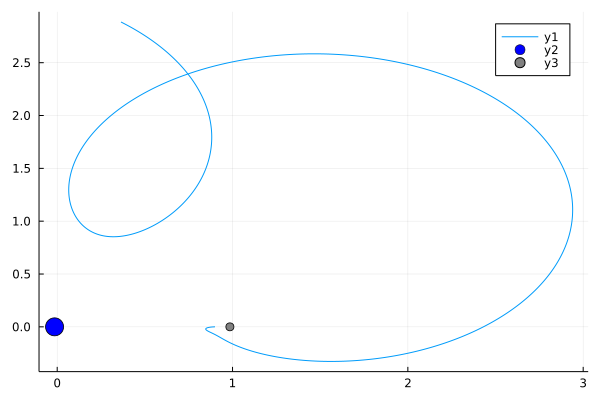

In [8]:
plot(vals[:,1], vals[:,2])
scatter!([-mu], [0], markersize=10, color=:blue)
scatter!([1-mu], [0], markersize=5, color=:gray)

In [9]:
h = 0.001
M = 5.972 * (10^24)  #  mass of the earth
m = 7.348 * (10^22)  #  mass of the moon
mu = m/(m+M)
display(mu)
v = [L1 0 0 0 0 0] #[0.994 0 0 0 -2.0015851063790825224053786222 0]
n = 100000
vals = zeros((n, 6))
vals[1, :] = v

for i=2:n
    vals[i,:] = vals[i-1,:] + h*(f(vals[i-1, :], mu)[1,:])
    # vals[i, :] = vals[i-1, :]
    # for j=1:5
    #     a = vals[i-1, :] 
    #     b = (f(vals[i-1, :], mu) .+ f(vals[i, :], mu)).*(h/2)
    #     vals[i, :] = a + b[1,:]
    # end
end

0.5338047051873914

UndefVarError: UndefVarError: L1 not defined

In [48]:
function f(v, mu)
    x, y, z, vx, vy, vz = v
    mu_ = 1-mu
    R3 = ((x+mu)^2+y^2+z^2)^(2/3)
    r3 = ((x-mu_)^2+y^2+z^2)^(2/3)
    vx_ = -vy + (mu_*(x+mu))/R3 +(mu*(x-mu_))/r3
    vy_ = vx + (mu_/R3)*y +(mu/r3)*y 
    vz_ = 0 #(mu_/R3)*v[3]+(mu/r3)*v[3]
    return [vx vy vz vx_ vy_ vz_]
end

f (generic function with 1 method)

4-element Vector{Float64}:
 -0.01227747099999998
 -0.3
 10.256557017354034
 -3.7330814603710083

In [196]:
function f(v, mu)
    x, y, vx, vy = v
    mu_ = 1-mu
    R3 = ((x+mu)^2+y^2)^(3/2)
    r3 = ((x-mu_)^2+y^2)^(3/2)
    vx_ = x + 2*vy - mu_*((x+mu)/R3) - mu*((x-mu_)/r3)
    vy_ = y - 2*vx - mu_*(y/R3) - mu*(y/r3)
    if any(x->isnan(x), [vx, vy ,vx_, vy_ ])
        @printf("%f %f %f %f\n", vx, vy ,vx_, vy_)
        throw(ErrorException("nan %f ", vx))
    end
    return [vx, vy ,vx_, vy_ ]
end

0.000000 1.000000 NaN NaN


f (generic function with 1 method)

In [197]:
M = 5.972   #  mass of the earth
m = 7.348  #  mass of the moon
mu = m/(m+M*100)


L1 =  0.836915 #1*(m/(3*M))^(1/3)
L2 = 1.15568 # (1-mu) + L1
# L1 = (1-mu) - L1
# L2 =  1*(m/(3*M))^(1/3)
L3 = -1.00506 #-(1-mu) - (5/12)*(m/M) 
L4 = (1-mu)-0.5
L4y = sqrt(3)/2
L5 = L4
L5y = -L4y

@printf("%f %f %f\n", L1, L2, L3)

0.836915 1.155680 -1.005060


In [193]:
function step_mid(v, mu, h)
    nv = copy(v)
    for i=1:5
        nv = v + (h/2) * (f(v, mu) .+ f(nv, mu))[1,:]
    end
    v = v .+ h*f((v.+nv)/2, mu)[1,:]
    return v
end

step_mid (generic function with 1 method)

In [194]:
function step_rk(v,f,  mu, h)
    k1 = h*f(v, mu)
    k2 = h*f(v+(k1/2), mu)
    k3 = h*f(v+(k2/2), mu)
    k4 = h*f(v+ k3, mu)
    b = (k1 + 2*k2 + 2*k3 + k4)/6
    v = v + b
    return v
end

step_rk (generic function with 2 methods)

In [507]:
10.854568 / 384400

2.8237689906347557e-5

In [1304]:
(6378.0 / 1737.0 ) * 0.006

0.022031088082901554

In [1473]:
me = 5.974 * 10 ^24  #  mass of the earth
mm = 7.348 * 10 ^ 22  #  mass of the moon
re = 6378.0  #  radius of the earth in km
rm = 1737.0  #  radius of the moon in km
r12 = 384400.0  #  distance between the CoM of the earth and moon
M = me + mm
d = 0 #  distance the spacecraft is above the Earth

vbo = 9.394 #10.6934 #9148
nu = -122.7*pi/180
gamma = 5*pi/180.0  #  angle in radians of the flight path

vx = vbo * (sin(gamma) * cos(nu) - cos(gamma) * sin(nu))
#  velocity of the bo in the x direction
vy = vbo * (sin(gamma) * sin(nu) + cos(gamma) * cos(nu))
#  velocity of the bo in the y direction
ds = (re + d) / r12
display(ds)
ds = 0.022
xrel = ds*cos(nu)-mu
#  spacecraft x location relative to the earth
yrel = ds*sin(nu)


u0 = [xrel, yrel, vx, vy]

0.016592091571279916

4-element Vector{Float64}:
 -0.02416275805050841
 -0.018513237202796733
  7.432753868696602
 -5.7446850155056985

In [1489]:
mu = 0.012277471
display(mu)
v = [0.994, 0, 0, -2.00158510637908]
v = [0.994, 0, 0, -2.113898796694] #5.4368 
v = [0.994, 0, 0, -2.031732629557] #11.1243 
# v = [0.994, 0, 0, -2.75]
v = [1.2, 0, 0, -1.049357510]
v = [1.2, 0, 0, -1.5]
v = [0.994, 0, 0, -1.949]
v = [0.994, 0, 0, -1.951]
# v = [-mu-0.022, 0, 0, -9.315]
v = u0
# v = [-mu+0.01, 0, 0, 0]

# v = [-mu-0.015, 0, 0, 11.603]
# v = [(1-mu)+0.01, 0.01, -1.604, 0]
# v = [L1, 0, 0, 0]
display(v)
# v = u0
t = 1.3  #20#17.06521656
n = 100000
h = t/n
display(h)
vals = zeros((n, 4))
vals[1, :] = v

for i=2:n
    # vals[i,:] = vals[i-1,:] + h*f(vals[i-1,:], mu)[1,:]
    # vals[i, :] = vals[i-1, :]
    # display(sqrt(v[4]^2+v[5]^2))

    vals[i, :] = step_rk(vals[i-1,:], f, mu, h)
    # vals[i, :] = step_mid(vals[i-1,:], mu, h)
end

0.012277471

4-element Vector{Float64}:
 -0.02416275805050841
 -0.018513237202796733
  7.432753868696602
 -5.7446850155056985

1.3000000000000001e-5

In [1490]:
vals

100000×4 Matrix{Float64}:
 -0.0241628  -0.0185132  7.43275   -5.74469
 -0.024066   -0.0185878  7.44687   -5.72253
 -0.0239691  -0.018662   7.46085   -5.70031
 -0.0238721  -0.018736   7.47469   -5.67804
 -0.0237748  -0.0188097  7.48839   -5.65572
 -0.0236774  -0.018883   7.50195   -5.63334
 -0.0235797  -0.0189561  7.51537   -5.61092
 -0.023482   -0.0190289  7.52866   -5.58845
 -0.023384   -0.0191014  7.5418    -5.56593
 -0.0232859  -0.0191736  7.55481   -5.54337
  ⋮                                
  0.0588986  -0.271042   0.930248  -2.17149
  0.0589107  -0.271071   0.930151  -2.17136
  0.0589228  -0.271099   0.930054  -2.17123
  0.0589349  -0.271127   0.929957  -2.1711
  0.058947   -0.271155   0.92986   -2.17097
  0.0589591  -0.271184   0.929763  -2.17084
  0.0589712  -0.271212   0.929666  -2.17071
  0.0589832  -0.27124    0.929569  -2.17057
  0.0589953  -0.271268   0.929472  -2.17044

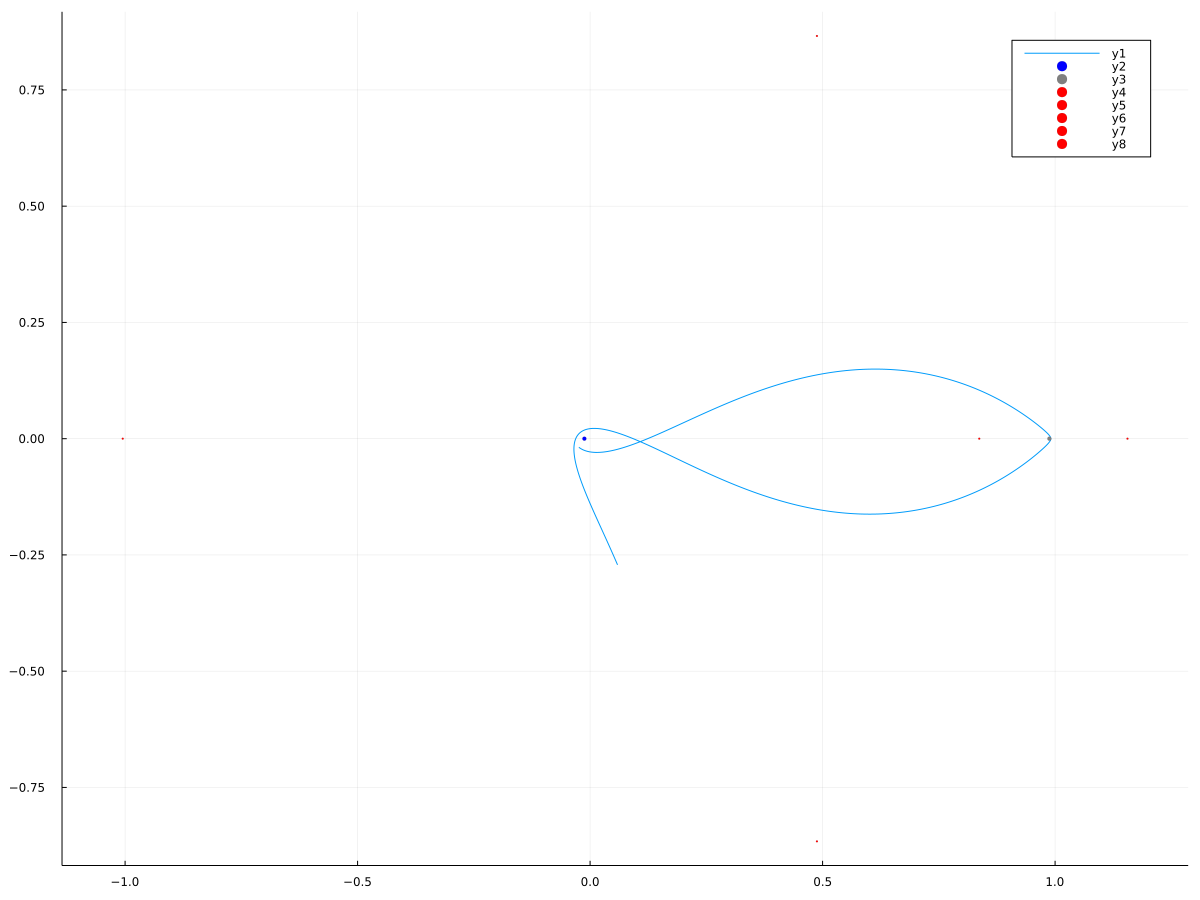

In [1491]:
plot(vals[:,1], vals[:,2], size=(1200, 900), aspect_ratio=:equal)
scatter!([-mu], [0], markersize=3, color=:blue, markerstrokewidth=0)
scatter!([1-mu], [0], markersize=3, color=:gray, markerstrokewidth=0)
scatter!([L1 L2 L3 L4 L5], [0 0 0 L4y L5y], markersize=2, color=:red, markerstrokewidth=0)

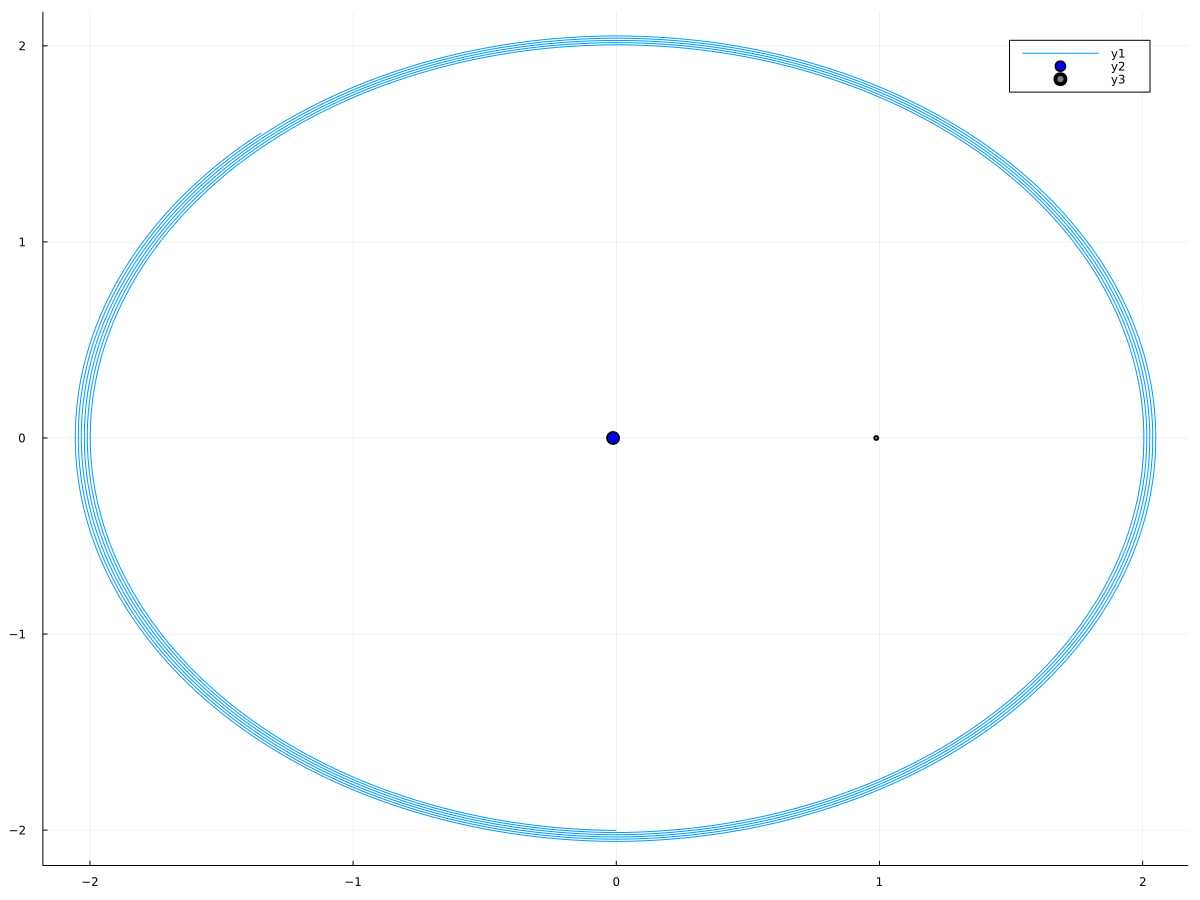

In [202]:
plot(vals[:,4], vals[:,5], size=(1200, 900))
scatter!([-mu], [0], markersize=7, color=:blue)
scatter!([1-mu], [0], markersize=3, color=:gray)